# Bag of Words Meets Bags of Popcorn


In [1]:
import pandas as pd

train = pd.read_csv('data/nsmc/ratings_train.txt', sep='\t', header=0)
test = pd.read_csv('data/nsmc/ratings_test.txt', sep='\t', header=0)

train.shape

(150000, 3)

In [14]:
train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [17]:
train.tail()

,id,document,label
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1
149999,9619869,한국 영화 최초로 수간하는 내용이 담긴 영화,0


In [16]:
train.columns

Index(['id', 'document', 'label'], dtype='object')

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
id          150000 non-null int64
document    149995 non-null object
label       150000 non-null int64
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [19]:
train.describe()

,id,label
count,1.500000e+05,150000.000000
mean,6.743533e+06,0.498847
std,2.919051e+06,0.500000
min,3.300000e+01,0.000000
25%,4.766881e+06,0.000000
50%,7.526840e+06,0.000000
75%,9.249435e+06,1.000000
max,1.027815e+07,1.000000


In [22]:
train['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [26]:
train['document'][0][:500]

'아 더빙.. 진짜 짜증나네요 목소리'

## 한글 자연어 처리 전처리 단계

**데이터 정제**
* 문자열에서 특수문자, HTML 태그 등 제거

**정규화(Normalization)**
* ㅇㅇㅇ

**토큰화(Tokenization)**
* 문자열에서 단어로 분리 시키는 단계

**불용어 제거(Stopword elimination)**
* 전치사, 관사 등 너무 많이 등장하는 단어나 문장이나 문서의 특징을 표현하는데 불필요한 단어 제거

**어간 추출(Stemming)**
* 단어의 기본 형태를 추출하는 단계

**어구 추출(Phrase extraction)**
* 

In [30]:
from konlpy.tag import Okt;
t = Okt()
tokens_ko = t.morphs('아 더빙.. 진짜 짜증나네요 목소리')
tokens_ko

['아', '더빙', '..', '진짜', '짜증나네요', '목소리']

[말뭉치](https://ko.wikipedia.org/wiki/%EB%A7%90%EB%AD%89%EC%B9%98)

In [2]:
def review_to_words(raw_review, stop_words=[]):
    import re
    if type(raw_review) is not str:
        return ' '.join('')
    
    from konlpy.tag import Okt
    okt = Okt()
    # 한글 및 공백을 제외한 문자 모두 제거
    review = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅑ\\s]", "", raw_review)
    # stop word 제거
    
    # 어간 추출
    stemming_words = okt.morphs(review, stem=True)
    
    if stop_words:
        stemming_words = [token for token in stemming_words if not token in stop_words]

    return ' '.join(stemming_words)

In [15]:
from konlpy.tag import Okt
okt = Okt()
#okt.morphs(None)
test = okt.morphs(' ')
' '.join(test)

''

In [35]:
words = [w for w in train['document'][0]]

words = ['']

if '' in words:
    print('Hello')

Hello


In [6]:
clean_review = review_to_words(train['document'][0])
clean_review

'아 더빙 .. 진짜 짜증나네요 목소리'

In [3]:
num_reviews = train['document'].size
num_reviews

150000

In [11]:
clean_train_reviews = list()
for i in range(num_reviews):
    try:
        clean_train_reviews.append(review_to_words(train['document'][i]))
    except Exception as e:
        print(train['document'][i])
        
    if i % 10000 == 0:
        print(f'{i} index processed.')

0 index processed.
10000 index processed.
20000 index processed.
nan
30000 index processed.
40000 index processed.
50000 index processed.
nan
60000 index processed.
70000 index processed.
80000 index processed.
90000 index processed.
100000 index processed.
110000 index processed.
nan
120000 index processed.
nan
130000 index processed.
140000 index processed.
nan


``` python
RuntimeError: No matching overloads found. at native/common/jp_method.cpp:121 #56
```
네이버 영화 데이터에 nan 이라는게 있어서 발생한 오류인데 nan 이 구체적으로 무엇인지 확인이 필요

https://github.com/konlpy/konlpy/issues/56

이것 참고해서 전처리 구현
https://github.com/reniew/NSMC_Sentimental-Analysis/blob/master/notebook/NSMC_Preprocessing.ipynb

In [4]:
clean_train_reviews = list()
%time train['review_clean'] = train['document'].apply(review_to_words)

CPU times: user 4min 39s, sys: 2.03 s, total: 4min 41s
Wall time: 4min 28s


In [18]:
%time test['review_clean'] = test['document'].apply(review_to_words)

CPU times: user 1min 30s, sys: 730 ms, total: 1min 30s
Wall time: 1min 28s


In [30]:
from multiprocessing import Pool
import numpy as np

def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    # 키워드 항목 중 workers 파라메터를 꺼냄
    workers = kwargs.pop('workers')
    
    # 위에서 가져온 workers 수로 프로세스 풀을 정의
    pool = Pool(processes=workers)
    
    # 실행할 함수와 데이터프레임을 워커의 수 만큼 나눠 작업
    result = pool.map(_apply_df, [(d, func, kwargs)
                                 for d in np.array_split(df, workers)])
    pool.close()
    
    # 작업 결과를 합쳐서 반환
    return pd.concat(list(result))

In [ ]:
%time clean_train_reviews = apply_by_multiprocessing(train['document'], review_to_words, workers=4)

In [6]:
len(train['review_clean'])

150000

In [19]:
len(test['review_clean'])

50000

In [7]:
train['review_clean'][0]

'아 더빙 진짜 짜증나다 목소리'

In [20]:
test['review_clean'][0]

'굳다 ㅋ'

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer(analyzer = 'word',
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = None,
                            min_df = 2, # 토큰이 나타날 최소 문서 개수
                            ngram_range = (1, 3),
                            max_features = 2000
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=2000, min_df=2,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [23]:
# 속도 개선을 위해 파이프라인을 사용하도록 개선
pipeline = Pipeline([
    ('vect', vectorizer),
])

In [24]:
%time train_data_features = pipeline.fit_transform(train['review_clean'])
train_data_features

CPU times: user 6.54 s, sys: 162 ms, total: 6.71 s
Wall time: 6.71 s


<150000x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 1084809 stored elements in Compressed Sparse Row format>

In [26]:
%time test_data_features = pipeline.transform(test['review_clean'])
test_data_features = test_data_features.toarray()

CPU times: user 803 ms, sys: 97 µs, total: 803 ms
Wall time: 801 ms


In [11]:
train_data_features.shape

(150000, 2000)

In [27]:
test_data_features.shape

(50000, 2000)

In [12]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
print(vocab[:10])

2000
['ㄷㄷ', 'ㅅㅂ', 'ㅇㅇ', 'ㅉㅉ', 'ㅋㅋ', 'ㅋㅋㅋ', 'ㅋㅋㅋㅋ', 'ㅋㅋㅋㅋㅋ', 'ㅋㅋㅋㅋㅋㅋ', 'ㅋㅋㅋㅋㅋㅋㅋ']


In [13]:
# 벡터화 된 피처를 확인해 봄
import numpy as np
dist = np.sum(train_data_features, axis=0)
for tag, count in zip(vocab, dist):
    print(count, tag)
    
pd.DataFrame(dist, columns=vocab)

[[251 215 205 ... 166 340 638]] ㄷㄷ


,ㄷㄷ,ㅅㅂ,ㅇㅇ,ㅉㅉ,ㅋㅋ,ㅋㅋㅋ,ㅋㅋㅋㅋ,ㅋㅋㅋㅋㅋ,ㅋㅋㅋㅋㅋㅋ,ㅋㅋㅋㅋㅋㅋㅋ,...,흥미진진,흥미진진 하다,흥행,희다,희망,희생,히어로,힐링,힘드다,힘들다
0,251,215,205,386,4317,2466,1065,299,142,117,...,278,119,311,185,215,165,137,166,340,638


In [14]:
pd.DataFrame(train_data_features[:10].toarray(), columns=vocab).head()

,ㄷㄷ,ㅅㅂ,ㅇㅇ,ㅉㅉ,ㅋㅋ,ㅋㅋㅋ,ㅋㅋㅋㅋ,ㅋㅋㅋㅋㅋ,ㅋㅋㅋㅋㅋㅋ,ㅋㅋㅋㅋㅋㅋㅋ,...,흥미진진,흥미진진 하다,흥행,희다,희망,희생,히어로,힐링,힘드다,힘들다
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 랜덤포레스트

In [15]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state=2018
)
print(forest)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)


In [16]:
%time forest = forest.fit(train_data_features, train['label'])

CPU times: user 15min 1s, sys: 1.99 s, total: 15min 3s
Wall time: 2min 2s


In [17]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(forest, train_data_features, train['label'], cv=10, scoring='roc_auc'))

CPU times: user 25.9 s, sys: 2.42 s, total: 28.3 s
Wall time: 16min 11s


In [29]:
# 테스트 데이터를 넣고 예측한다
result = forest.predict(test_data_features)
result[:10]

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [30]:
output = pd.DataFrame(data={'id':test['id'], 'sentiment':result})
output.head()

,id,sentiment
0,6270596,1
1,9274899,0
2,8544678,0
3,6825595,1
4,6723715,0


In [32]:
output.to_csv('data/nsmc/tutorial_1_BOW_{0:.5f}.csv'.format(score), index=False, quoting=3)

In [33]:
output_sentiment = output['sentiment'].value_counts()
print(output_sentiment[0] - output_sentiment[1])
output_sentiment

2038


0    26019
1    23981
Name: sentiment, dtype: int64

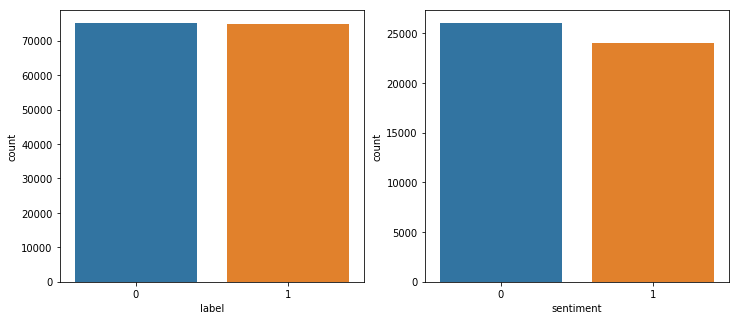

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)
sns.countplot(train['label'], ax=axes[0])
sns.countplot(output['sentiment'], ax=axes[1])
plt.show()